# 1. Import necessary libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load the pre-split dataset

In [5]:
# Read the training and testing datasets from CSV files
X_train = pd.read_csv("/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/X_train.csv")
X_test = pd.read_csv("/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/X_test.csv")
y_train = pd.read_csv("/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/y_train.csv")
y_test = pd.read_csv("/Users/yenanchen/Documents/Home/Mannheim/2024HWS/Data-Mining/DM-Project/telco-customer-churn/2_data/y_test.csv")

# Ensure the target variable has the correct shape (1D array)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# 3. Standardize the features

In [7]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Initialize and train the KNN model

In [9]:
# Set the number of neighbors (k)
k = 5  # You can adjust this value to find the optimal k
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier on the scaled training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

# 5. Make predictions

In [11]:
# Predict on the testing data
y_pred = knn.predict(X_test_scaled)

# 6. Evaluate the model

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display a classification report (precision, recall, F1-score, support)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1035
           1       0.75      0.71      0.73       374

    accuracy                           0.86      1409
   macro avg       0.82      0.81      0.82      1409
weighted avg       0.86      0.86      0.86      1409

Confusion Matrix:
[[945  90]
 [107 267]]


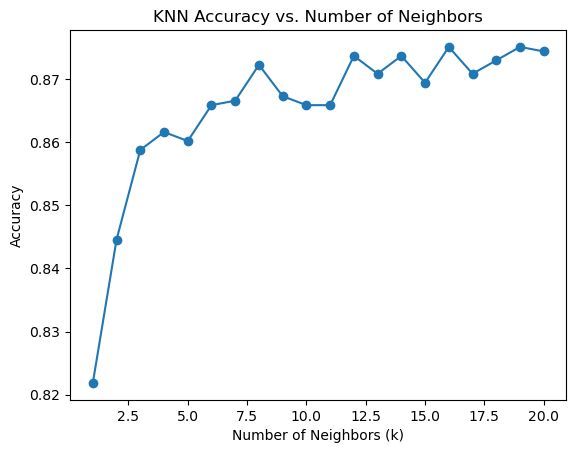

In [14]:
import matplotlib.pyplot as plt

k_values = range(1, 21)  # Test k values from 1 to 20
accuracies = []

# Iterate through k values and evaluate the model
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot the accuracy for each k value
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.show()